In [83]:
import numpy as np
from numpy import linalg
import cvxopt 
import pandas as pd
import matplotlib.pyplot as plt
cvxopt.solvers.options['show_progress'] = False
             
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=1):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))



In [84]:
data = pd.read_csv("hw2data.csv",header = None) 
# Preview the first 5 lines of the loaded data 
data.head()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [93]:
def get_next_train_valid(X_shuffled, y_shuffled, itr, k):
    """
    - itr value can tell you which fold you pick up for valid and rest go to training
    - use 1 fold for validation and all other folds for training
    - in next iteration, use a different fold for validation and remaining folds for training
        
    Basically, here you will determine which fold goes for validation and which ones for training
    """
    X_valid = X_shuffled[itr*len(X_shuffled)//k:(itr+1)*len(X_shuffled)//k,:]
    Y_valid = y_shuffled[itr*len(y_shuffled)//k:(itr+1)*len(y_shuffled)//k]
    
    X_train = np.delete(X_shuffled, np.s_[itr*len(X_shuffled)//k:(itr+1)*len(X_shuffled)//k:1], 0)
    Y_train = np.delete(y_shuffled, np.s_[itr*len(y_shuffled)//k:(itr+1)*len(y_shuffled)//k:1], 0)
    
    
    return  X_train, Y_train, X_valid, Y_valid

def train(X_train, y_train, C):
    table = (np.tile(np.vstack(X_train[:,0]), len(X_train))-X_train[:,0])**2 + (np.tile(np.vstack(X_train[:,1]), len(X_train))-X_train[:,1])**2
    P_pre =  np.multiply(np.vstack(y_train),y_train) * np.exp(-1/2*table)
    P = cvxopt.matrix(P_pre, tc= 'd')
    q = -cvxopt.matrix(np.ones(len(X_train)), tc = 'd')
    G = cvxopt.matrix(np.concatenate((np.identity(len(X_train)),-np.identity(len(X_train)))),tc = 'd')
    h = cvxopt.matrix(np.concatenate((C*np.ones(len(X_train)),np.zeros(len(X_train)))), tc = 'd')
    sol = cvxopt.solvers.qp(P,q,G,h)
    lamda = sol['x']
    return lamda

def predict(X_valid, X_train, y_train, lamda ):
    obj = np.zeros(len(X_valid))
    table2 = (np.tile(np.vstack(X_valid[:,0]), len(X_train))-X_train[:,0])**2 + (np.tile(np.vstack(X_valid[:,1]), len(X_train))-X_train[:,1])**2
    obj =  np.sum(np.exp(-1/2*table2)*np.hstack(lamda)*np.hstack(y_train),axis=1)
    return np.sign(obj)


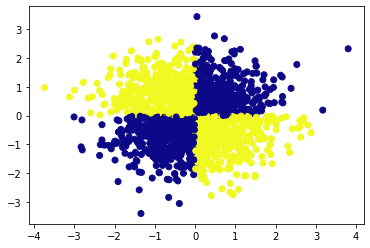

In [94]:
data = pd.read_csv("hw2data.csv", header = None)
samples = np.array(data)


np.random.shuffle(samples)

test_sample = samples[:len(samples)//5]
train_sample = samples[len(samples)//5:]


X_learn = train_sample[:,:-1]
y_learn = train_sample[:,-1]
X_test = test_sample[:,:-1]
y_test = test_sample[:,-1]
plt.scatter(X_learn[:,0],X_learn[:,1],c= y_learn ,cmap='plasma')
plt.show()



In [95]:
#k fold = 10
k = 10

C_set =  [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# record the accuracy
score_valid = np.zeros(k)
score_train = np.zeros(k)

mean_score_valid =np.zeros(len(C_set))
mean_score_train =np.zeros(len(C_set))
score_test = np.zeros(len(C_set))
W = np.zeros(2)
for j in range(len(C_set)):
        for i in range(k):
            
            X_train, y_train, X_valid, y_valid = get_next_train_valid(X_learn, y_learn, i , k)
            
            W = train(X_train, y_train, C_set[j])
            print("C = %d,K = %d 's model Done"% (j,i))
            
            y_predict_train = predict(X_train, X_train, y_train, W)
            y_predict = predict(X_valid, X_train, y_train, W)
            y_predict_train = np.reshape(y_predict_train,len(X_train))
            y_predict = np.reshape(y_predict,len(X_valid))

            score_valid[i] = np.sum(y_valid == y_predict)/len(X_valid)
            score_train[i] = np.sum(y_train == y_predict_train)/len(X_train)
            
        mean_score_valid[j] = np.mean(score_valid)
        mean_score_train[j] = np.mean(score_train)
        
        #train on full training set
        W = train(X_learn, y_learn , C_set[j])
        print("C %d 's predict model Done"% (j))
        y_test_train = predict(X_test, X_learn, y_learn, W)
        y_test_train = np.reshape(y_test_train,len(X_test))
        score_test[j] = np.sum(y_test_train == y_test)/len(X_test)

C = 0,K = 0 's model Done
C = 0,K = 1 's model Done
C = 0,K = 2 's model Done
C = 0,K = 3 's model Done
C = 0,K = 4 's model Done
C = 0,K = 5 's model Done
C = 0,K = 6 's model Done
C = 0,K = 7 's model Done
C = 0,K = 8 's model Done
C = 0,K = 9 's model Done
C 0 's predict model Done
C = 1,K = 0 's model Done
C = 1,K = 1 's model Done
C = 1,K = 2 's model Done
C = 1,K = 3 's model Done
C = 1,K = 4 's model Done
C = 1,K = 5 's model Done
C = 1,K = 6 's model Done
C = 1,K = 7 's model Done
C = 1,K = 8 's model Done
C = 1,K = 9 's model Done
C 1 's predict model Done
C = 2,K = 0 's model Done
C = 2,K = 1 's model Done
C = 2,K = 2 's model Done
C = 2,K = 3 's model Done
C = 2,K = 4 's model Done
C = 2,K = 5 's model Done
C = 2,K = 6 's model Done
C = 2,K = 7 's model Done
C = 2,K = 8 's model Done
C = 2,K = 9 's model Done
C 2 's predict model Done
C = 3,K = 0 's model Done
C = 3,K = 1 's model Done
C = 3,K = 2 's model Done
C = 3,K = 3 's model Done
C = 3,K = 4 's model Done
C = 3,K = 5 

In [96]:

print(mean_score_valid)
print(mean_score_train)
print(score_test)

[0.94125  0.94125  0.946875 0.9575   0.97625  0.984375 0.985    0.99    ]
[0.94416667 0.94416667 0.95090278 0.96541667 0.98423611 0.98902778
 0.99201389 0.99618056]
[0.965  0.965  0.9625 0.9675 0.9825 0.9825 0.9875 0.985 ]


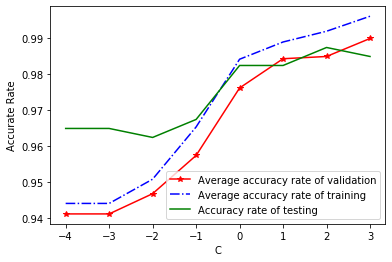

In [99]:
plt.xlabel('C')
plt.ylabel('Accurate Rate')
plt.plot(np.log10(C_set),  mean_score_valid, 'r-*',label = 'Average accuracy rate of validation')   
plt.plot(np.log10(C_set),  mean_score_train, 'b-.',label = 'Average accuracy rate of training')  
plt.plot(np.log10(C_set), score_test, 'g-', label = 'Accuracy rate of testing')
plt.legend()